# [Exploratory Data Analysis with Python for Beginner](https://academy.dqlab.id/main/package/practice/163?pf=0)

Memperkenalkan kamu pada konsep dasar dalam pengolahan data menggunakan Python, penjelasan mengenai library penting yang perlu dikuasai dalam penggunaan Python, serta contoh pemanfaatan Python dalam membuat summary data sederhana pada tahap pre-proses analisis. 

---

## Chapter 2 - Exploratory Data Analysis dengan Pandas - Part 1

---

### Membaca File dari Excel atau CSV sebagai data frame

In [4]:
import pandas as pd
order_df = pd.read_csv("data/order.csv")

### Tugas Praktek

In [10]:
print(order_df.shape)

(49999, 12)


### Tugas Praktek

In [11]:
print(order_df.head(10))

                           order_id  quantity  \
0  2e7a8482f6fb09756ca50c10d7bfc047         2   
1  2e7a8482f6fb09756ca50c10d7bfc047         1   
2  e5fa5a7210941f7d56d0208e4e071d35         1   
3  3b697a20d9e427646d92567910af6d57         1   
4  71303d7e93b399f5bcd537d124c0bcfa         1   
5  be5bc2f0da14d8071e2d45451ad119d9         1   
6  0a0837a5eee9e7a9ce2b1fa831944d27         1   
7  1ff217aa612f6cd7c4255c9bfe931c8b         1   
8  22613579f7d11cc59c4347526fc3c79e         1   
9  356b492aba2d1a7da886e54e0b6212b7         1   

                         product_id    price  \
0  f293394c72c9b5fafd7023301fc21fc2  1489000   
1  c1488892604e4ba5cff5b4eb4d595400  1756000   
2  f3c2d01a84c947b078e32bbef0718962  1707000   
3  3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4  d2998d7ced12f83f9b832f33cf6507b6  3833000   
5  fd7fd78fd3cbc1b0a6370a7909c0a629  1480000   
6  583916a5dae918f5e89baec139141c54  4489000   
7  33430c5c1027d812b5c62f778e5ee7f7   822000   
8  3ff81cd0e0861e991bb0106c0

### Tugas Praktek

In [12]:
# Quick summary  dari segi kuantitas, harga, freight value, dan weight
print(order_df.describe())

# Median dari total pembelian konsumen per transaksi kolom price
print(order_df.loc[:, "price"].median())

           quantity         price  freight_value  product_weight_gram
count  49999.000000  4.999900e+04   49999.000000         49980.000000
mean       1.197484  2.607784e+06  104521.390428          2201.830892
std        0.722262  1.388312e+06   55179.844962          3929.896875
min        1.000000  2.000000e+05    9000.000000            50.000000
25%        1.000000  1.410500e+06   57000.000000           300.000000
50%        1.000000  2.610000e+06  104000.000000           800.000000
75%        1.000000  3.810000e+06  152000.000000          1850.000000
max       21.000000  5.000000e+06  200000.000000         40425.000000
2610000.0


---

## Exploratory Data Analysis dengan Pandas - Part 2

---

### Mengenal dan Membuat Distribusi Data dengan Histogram

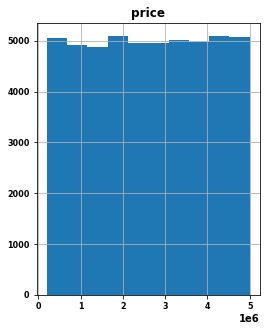

In [16]:
import matplotlib.pyplot as plt

# plot histogram kolom: price
order_df[["price"]].hist(figsize=(4, 5), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()  # Untuk menampilkan histogram plot

### Standar Deviasi dan Varians pada Pandas

In [18]:
# Standar variasi kolom product_weight_gram
order_df.loc[:, "product_weight_gram"].std()

3929.8968753726213

In [19]:
# Varians kolom product_weight_gram
order_df.loc[:, "product_weight_gram"].var()

15444089.451063491

### Menemukan Outliers Menggunakan Pandas

In [20]:
# Hitung quartile 1
Q1 = order_df[["product_weight_gram"]].quantile(0.25)

# Hitung quartile 3
Q3 = order_df[["product_weight_gram"]].quantile(0.75)

# Hitung inter quartile range dan cetak ke console
IQR = Q3 - Q1
print(IQR)

product_weight_gram    1550.0
dtype: float64


### Rename Kolom Data Frame

In [31]:
order_df.rename(columns={"freight_value": "shipping_cost"}, 
                inplace=True)
display(order_df)

,order_id,quantity,product_id,price,seller_id,shipping_cost,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-03,e-wallet,fashion,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,ec88157ad03aa203c3fdfe7bace5ab6b,1,165f86fe8b799a708a20ee4ba125c289,3077000,7ddcbb64b5bc1ef36ca8c151f6ec77df,172000,1642b8087a8ca0c8592becff7e183c98,delivered,2017-12-15,e-wallet,automotive,2425.0
49995,ed60085e92e2aa3debf49159deb34da7,1,6e835aea84ae8eb68b8c14878dd43b30,1277000,4d6d651bd7684af3fffabd5f08d12e5a,130000,431bbb57d52f3141ab2f33a6a4cf00a6,delivered,2017-12-15,debit card,beauty,2350.0
49996,ed98c37d860890f940e2acd83629fdd1,2,aca2eb7d00ea1a7b8ebd4e68314663af,486000,955fee9216a65b617aa5c0531780ce60,14000,71f8cd490677ee95362201588c0eaff4,delivered,2017-12-15,debit card,gadget,2600.0
49997,ed98c37d860890f940e2acd83629fdd1,1,aca2eb7d00ea1a7b8ebd4e68314663af,830000,955fee9216a65b617aa5c0531780ce60,108000,71f8cd490677ee95362201588c0eaff4,delivered,2017-12-15,e-wallet,gadget,2600.0


### Groupby Menggunakan Pandas

In [30]:
# Hitung rata rata dari price per payment_type
rata_rata = order_df["price"].groupby(order_df["payment_type"]).mean()
print(rata_rata)

payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64


### Sorting Menggunakan Pandas

In [26]:
# Hitung harga maksimum pembelian customer
sort_harga = order_df.sort_values(by="price", ascending=False)
display(sort_harga)

,order_id,quantity,product_id,price,seller_id,shipping_cost,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
37085,d7b2d3b902441cf3dd12cd125533217d,1,35afc973633aaeb6b877ff57b2793310,5000000,4a3ca9315b744ce9f8e9374361493884,118000,217344c7c334e16c8e76551b4b240c1d,delivered,2017-10-31,debit card,beauty,1825.0
41958,2711089c7fec59d4dc8483e3c6a12fa3,1,7c1bd920dbdf22470b68bde975dd3ccf,5000000,cc419e0650a3c5ba77189a1882b7556a,31000,0ef59d9bb071def3dbf7e7b055965e95,delivered,2017-11-24,e-wallet,fashion,200.0
3976,f343624eab419250ad81f1ce6be22c93,1,777d2e438a1b645f3aec9bd57e92672c,5000000,4a3ca9315b744ce9f8e9374361493884,101000,3fc0d940852ab274e532e80b1c1d5c2f,delivered,2017-03-07,debit card,gadget,950.0
21072,c8947a583ab9791a5a9d02384cb84302,1,f8cfb63e323be2e1c4172f255d61843d,5000000,4a3ca9315b744ce9f8e9374361493884,184000,57c047e791e69bef0af220b0a165a22d,delivered,2017-07-27,credit card,beauty,550.0
47074,f6134169ca6f0cdfbe6458ebb5731613,1,2ea92fab7565c4fe9f91a5e4e1756258,5000000,3d871de0142ce09b7081e2b9d1733cb1,196000,cbfdcc896d6ebc83c21fdcf4f4762efc,delivered,2017-12-04,virtual account,gadget,10600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33786,0d9e86e02c1a823b20c03ea29d616607,1,f93213a23c50edc16c27b96333f734dc,200000,46dc3b2cc0980fb8ec44634e21d2718e,141000,edaad9e07395713e9f5a2124f6c846a1,delivered,2017-10-13,debit card,automotive,7550.0
42166,54220fcc516cabe9ec84b210c0765ef2,1,1166bc797ddf5fb009c376d133f61204,200000,5cbbd5a299cab112b7bf23862255e43e,175000,24e7dc2ff8c07126358af519732b8558,delivered,2017-11-24,e-wallet,gadget,1100.0
31745,59a19c83ff825948739dd1601cc107b6,1,eb38a7604070a2b8465101ed53cba72b,200000,e6a69c4a27dfdd98ffe5aa757ad744bc,112000,2bf857ee40b763708fe19cf877cac511,delivered,2017-10-01,e-wallet,beauty,550.0
42452,9960ee97c2f8d801a200a01893b3942f,1,db5efde3ad0cc579b130d71c4b2db522,200000,4869f7a5dfa277a7dca6462dcf3b52b2,26000,54af40597a8931fea3fbb2b37656fc8d,delivered,2017-11-24,credit card,automotive,6663.0


---

## Mini Project

---

### Tugas dari Andra

Pembahasan cabang supermarket kita. Berikut detailnya:

1. Median price yang dibayar customer dari masing-masing metode pembayaran.
2. Tentukan metode pembayaran yang memiliki basket size (rataan median price) terbesar.
3. Ubah freight_value menjadi shipping_cost dan cari shipping_cost termahal dari data penjualan tersebut menggunakan sort.
4. Untuk setiap product_category_name, berapa rata-rata weight produk tersebut dan standar deviasi mana yang terkecil dari weight tersebut,
5. Buat histogram quantity penjualan dari dataset tersebut untuk melihat persebaran quantity penjualan tersebut dengan bins = 5 dan figsize= (4,5)

payment_type
credit card        2587500.0
debit card         2621500.0
e-wallet           2589000.0
virtual account    2643000.0
Name: price, dtype: float64

,order_id,quantity,product_id,price,seller_id,shipping_cost,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
23829,7d63cb1d349e7bd0ee1edcc61ea71077,1,75d6b6963340c6063f7f4cfcccfe6a30,1472000,cc419e0650a3c5ba77189a1882b7556a,200000,484711e3d14ac75fb874e949b3a28395,delivered,2017-08-14,credit card,gadget,400.0
12011,00c9f7d4b0e87781465e562dc109f6aa,1,1a0d662b65b5ef08796501b064c853af,4543000,2e0dba2da448400b1c11d7b4b22f32a4,200000,cea80f9af87104810bd7fa9698f69d29,delivered,2017-05-22,e-wallet,toys,900.0
10984,69013d19f8db4cd7dc9f3b5c2564a96f,1,10d196ec072e2d8382c7ec9c942d7ea8,4137000,d12c926d74ceff0a90a21184466ce161,200000,9cf423929ed7f738fd0a0e88607a79fd,delivered,2017-05-15,credit card,utilities,250.0
29722,f32c4d2b078bc5a354f4c1184522b5ff,1,0f789be671fe3bd93cabfbb4a710f282,4802000,259f7b5e6e482c230e5bfaa670b6bb8f,200000,5a1523d32a6d1b323a05895f5164655d,delivered,2017-09-18,credit card,toys,450.0
15259,c8eab0ccabe8cdfc2afce66c1c554ae2,1,800f75019492a0d9ffb2483ae65b59f1,4078000,efcd8d2104f1a05d028af7bad20d974b,200000,2339ab3abbeebe72f2782a01c87a9bc0,delivered,2017-06-14,debit card,sports,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2891,1d0e8770169496e47622b6cbc0d10bda,1,3fc0f58c51fcd02161542e0320c4dbe7,4135000,82e0a475a88cc9595229d8029273f045,9000,e3cfff24939005d30dd3a046848227d6,delivered,2017-02-22,debit card,fashion,900.0
36815,4bff82a994068f564e54b52b08ef4512,2,24d8da2d499efba175b1092826b7e390,2879000,d12c926d74ceff0a90a21184466ce161,9000,2e998a151ac7a977d4a7e806346e0092,delivered,2017-10-30,e-wallet,fashion,150.0
8175,e6b1fa22555c3064f984ebeb8a88de77,1,6fd82d8f842424334fedf31190e54d24,2947000,6560211a19b47992c3666cc44a7e94c0,9000,02d6ca625564571402a933db8fe814f0,delivered,2017-04-21,virtual account,electronics,250.0
4034,8ac2728285fd4228f35d907768b5288a,4,fa94f25a73969e3a25d52706e246dfcc,967000,004c9cd9d87a3c30c522c48c4fc07416,9000,6b5e281c1563241783deb3a2636daa28,delivered,2017-03-08,virtual account,fashion,1700.0


product_category_name
beauty         2120.088396
automotive     2129.559039
electronics    2144.751191
toys           2203.863643
gadget         2229.632942
fashion        2246.516901
sports         2251.879909
utilities      2291.029868
Name: product_weight_gram, dtype: float64


product_category_name
automotive     3799.884166
beauty         3837.474929
electronics    3839.271768
fashion        3858.885213
gadget         3955.792741
toys           3956.814749
sports         4032.850044
utilities      4150.509909
Name: product_weight_gram, dtype: float64

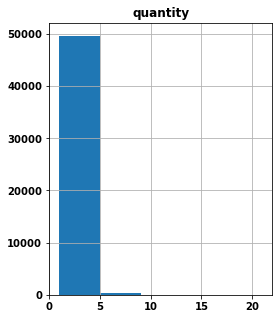

In [33]:
# Median price yang dibayar customer dari masing-masing metode pembayaran. 
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
display(median_price)

# Ubah freight_value menjadi shipping_cost dan cari shipping_cost 
# termahal dari data penjualan tersebut menggunakan sort.
order_df.rename(columns={"freight_value" : "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
display(sort_value)

# Untuk product_category_name, berapa  rata-rata weight produk tersebut 
# dan standar deviasi mana yang terkecil dari weight tersebut, 
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value.sort_values())
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
display(std_value.sort_values())

# Buat histogram quantity penjualan dari dataset tersebutuntuk melihat persebaran quantity 
# penjualan tersebut dengan bins = 5 dan figsize= (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=5)
plt.show()